In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from __future__ import print_function
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.regularizers import l1
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
def plot_autoencoder_outputs(autoencoder, n, dims):
    decoded_imgs = autoencoder.predict(x_test)

    # number of example digits to show
    n = 5
    plt.figure(figsize=(10, 4.5))
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Original Images')

        # plot reconstruction 
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Reconstructed Images')
    plt.show()

def plot_loss(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, historydf.values.max()))
    plt.title('Loss: %.3f' % history.history['loss'][-1])
    
def plot_compare_histories(history_list, name_list, plot_accuracy=True):
    dflist = []
    min_epoch = len(history_list[0].epoch)
    losses = []
    for history in history_list:
        h = {key: val for key, val in history.history.items() if not key.startswith('val_')}
        dflist.append(pd.DataFrame(h, index=history.epoch))
        min_epoch = min(min_epoch, len(history.epoch))
        losses.append(h['loss'][-1])

    historydf = pd.concat(dflist, axis=1)

    metrics = dflist[0].columns
    idx = pd.MultiIndex.from_product([name_list, metrics], names=['model', 'metric'])
    historydf.columns = idx
    
    plt.figure(figsize=(6, 8))

    ax = plt.subplot(211)
    historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
    plt.title("Training Loss: " + ' vs '.join([str(round(x, 3)) for x in losses]))
    
    if plot_accuracy:
        ax = plt.subplot(212)
        historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
        plt.title("Accuracy")
        plt.xlabel("Epochs")
    
    plt.xlim(0, min_epoch-1)
    plt.tight_layout()

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_train = x_train[:10000,]
x_test = x_test[:2000,]



print(x_train.shape)
print(x_test.shape)

(10000, 784)
(2000, 784)


In [5]:
input_size = 784
hidden_size = 128
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=5)

Epoch 1/5
10000/10000 [==============================] - 2s 194us/step - loss: 0.2245

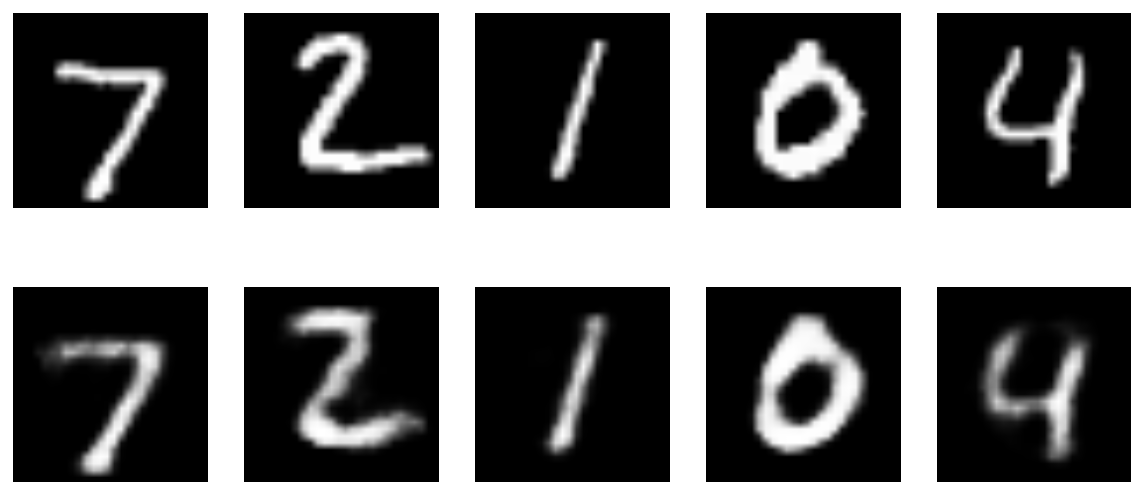

In [6]:
plot_autoencoder_outputs(autoencoder, 5, (28, 28))

In [ ]:
#######################################################################################

In [2]:
import pandas as pd
import os

In [3]:
os.chdir('/home/ruidong/Documents/DL/')

In [4]:
rna = pd.read_csv('rna.TCGA-PRAD.csv')

In [5]:
rna.head()

,Unnamed: 0,TCGA-2A-A8VL-01,TCGA-2A-A8VO-01,TCGA-2A-A8VT-01,TCGA-2A-A8VV-01,TCGA-2A-A8VX-01,TCGA-2A-A8W1-01,TCGA-2A-A8W3-01,TCGA-2A-AAYF-01,TCGA-2A-AAYO-01,...,TCGA-ZG-A9LM-01,TCGA-ZG-A9LN-01,TCGA-ZG-A9LU-01,TCGA-ZG-A9LY-01,TCGA-ZG-A9LZ-01,TCGA-ZG-A9M4-01,TCGA-ZG-A9MC-01,TCGA-ZG-A9N3-01,TCGA-ZG-A9ND-01,TCGA-ZG-A9NI-01
0,ENSG00000000003,5.915415,5.498494,5.661540,6.350712,6.714066,5.602361,4.866321,6.628321,5.655178,...,6.353421,4.936636,5.138604,5.591158,6.618027,5.542725,5.322190,6.361573,6.661057,4.828434
1,ENSG00000000419,4.833382,4.590251,4.832256,4.846135,4.658649,5.155204,4.847948,4.614591,4.515130,...,5.270186,4.877307,4.587414,4.761423,4.956725,4.692047,4.468222,5.640396,5.008361,4.620828
2,ENSG00000000457,4.331458,3.976175,5.123913,4.931638,4.291850,4.151124,3.942577,4.303086,4.193702,...,4.190045,3.916976,3.692441,4.103111,4.785847,5.070523,3.755997,3.875908,3.270678,3.612140
3,ENSG00000000460,1.330704,1.310722,2.299790,1.841518,1.389320,1.896599,2.058966,1.878231,1.570738,...,1.745421,2.188883,1.730808,1.848332,2.333141,2.307487,1.886540,3.580957,2.106126,1.897592
4,ENSG00000000938,1.747250,2.217087,1.880811,1.816643,0.475735,1.852611,2.382910,1.812079,3.060193,...,1.829859,3.293290,2.483627,2.266163,1.668871,2.414922,3.751687,1.103689,0.374514,1.764531


In [6]:
rna = rna.drop(['Unnamed: 0'], axis=1)

In [7]:
rna.head()

,TCGA-2A-A8VL-01,TCGA-2A-A8VO-01,TCGA-2A-A8VT-01,TCGA-2A-A8VV-01,TCGA-2A-A8VX-01,TCGA-2A-A8W1-01,TCGA-2A-A8W3-01,TCGA-2A-AAYF-01,TCGA-2A-AAYO-01,TCGA-2A-AAYU-01,...,TCGA-ZG-A9LM-01,TCGA-ZG-A9LN-01,TCGA-ZG-A9LU-01,TCGA-ZG-A9LY-01,TCGA-ZG-A9LZ-01,TCGA-ZG-A9M4-01,TCGA-ZG-A9MC-01,TCGA-ZG-A9N3-01,TCGA-ZG-A9ND-01,TCGA-ZG-A9NI-01
0,5.915415,5.498494,5.661540,6.350712,6.714066,5.602361,4.866321,6.628321,5.655178,5.990351,...,6.353421,4.936636,5.138604,5.591158,6.618027,5.542725,5.322190,6.361573,6.661057,4.828434
1,4.833382,4.590251,4.832256,4.846135,4.658649,5.155204,4.847948,4.614591,4.515130,4.867902,...,5.270186,4.877307,4.587414,4.761423,4.956725,4.692047,4.468222,5.640396,5.008361,4.620828
2,4.331458,3.976175,5.123913,4.931638,4.291850,4.151124,3.942577,4.303086,4.193702,4.804392,...,4.190045,3.916976,3.692441,4.103111,4.785847,5.070523,3.755997,3.875908,3.270678,3.612140
3,1.330704,1.310722,2.299790,1.841518,1.389320,1.896599,2.058966,1.878231,1.570738,1.852285,...,1.745421,2.188883,1.730808,1.848332,2.333141,2.307487,1.886540,3.580957,2.106126,1.897592
4,1.747250,2.217087,1.880811,1.816643,0.475735,1.852611,2.382910,1.812079,3.060193,0.993590,...,1.829859,3.293290,2.483627,2.266163,1.668871,2.414922,3.751687,1.103689,0.374514,1.764531


In [8]:
rna.shape

(15536, 490)

In [9]:
x_train = rna.values.T

In [10]:
x_train

array([[ 5.9154151 ,  4.83338201,  4.33145849, ..., -1.92630648,
        -1.3607093 , -4.24823457],
       [ 5.49849364,  4.59025056,  3.97617485, ..., -1.16058329,
         0.27075602, -6.20497741],
       [ 5.66153968,  4.83225562,  5.12391253, ..., -0.44744424,
        -0.51229538, -3.04834828],
       ...,
       [ 6.36157309,  5.64039638,  3.87590811, ...,  3.13002319,
         1.40419816, -1.21823905],
       [ 6.66105719,  5.00836105,  3.27067787, ...,  0.40970311,
        -1.01114001, -5.96533632],
       [ 4.82843366,  4.62082832,  3.61214026, ...,  1.3839266 ,
        -0.64355413, -2.75903135]])

In [11]:
x_train.shape

(490, 15536)

In [50]:
input_size = rna.shape[0]
hidden_size = 500
code_size = 100

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=50)

Epoch 1/50
490/490 [==============================] - 5s 10ms/step - loss: -43.2518

In [51]:
weights = autoencoder.get_weights()[2].T

In [52]:
weights.shape

(100, 500)

In [53]:
weights

array([[-0.06524642, -0.05159009,  0.03542354, ..., -0.00513449,
         0.05376873,  0.03225095],
       [-0.04835587,  0.04515109,  0.05611556, ..., -0.08310773,
         0.02920789,  0.01757512],
       [-0.03270845,  0.05504482,  0.03836574, ..., -0.01854942,
        -0.03165455,  0.07792514],
       ...,
       [ 0.08856194, -0.0886549 ,  0.00133891, ...,  0.03594368,
        -0.06287587, -0.07184975],
       [ 0.09458873, -0.04101182,  0.00305369, ...,  0.06267149,
         0.01781062,  0.0885625 ],
       [-0.06808594,  0.0465982 ,  0.01770247, ..., -0.09674139,
        -0.09051533,  0.01581977]], dtype=float32)

In [60]:
t = autoencoder.get_layer(index=2)

In [74]:
t.get_input_at

<bound method Layer.get_input_at of <keras.layers.core.Dense object at 0x7fb2287bebe0>>

In [76]:
autoencoder.layers[2]

In [82]:
autoencoder.

{0: [<keras.layers.core.Dense at 0x7fb23814bfd0>],
 1: [<keras.layers.core.Dense at 0x7fb2287bec88>],
 2: [<keras.layers.core.Dense at 0x7fb2287bebe0>],
 3: [<keras.layers.core.Dense at 0x7fb23066f198>],
 4: [<keras.engine.topology.InputLayer at 0x7fb23066f0b8>]}

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from keras.layers import Input
from keras.layers.core import Dense, Dropout
from keras.layers import regularizers
from keras.models import Model
from keras.optimizers import Adam

Using TensorFlow backend.


In [12]:
input_size = rna.shape[0]
hidden_size = 500
code_size = 100

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)


In [13]:
input_size

15536

In [14]:
x_train = rna.values.T

In [15]:
x_train

array([[ 5.9154151 ,  4.83338201,  4.33145849, ..., -1.92630648,
        -1.3607093 , -4.24823457],
       [ 5.49849364,  4.59025056,  3.97617485, ..., -1.16058329,
         0.27075602, -6.20497741],
       [ 5.66153968,  4.83225562,  5.12391253, ..., -0.44744424,
        -0.51229538, -3.04834828],
       ...,
       [ 6.36157309,  5.64039638,  3.87590811, ...,  3.13002319,
         1.40419816, -1.21823905],
       [ 6.66105719,  5.00836105,  3.27067787, ...,  0.40970311,
        -1.01114001, -5.96533632],
       [ 4.82843366,  4.62082832,  3.61214026, ...,  1.3839266 ,
        -0.64355413, -2.75903135]])

In [16]:
autoencoder = Model(input_img, output_img)

In [17]:
autoencoder

In [18]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=10, batch_size=200, shuffle=True)

Epoch 1/10
490/490 [==============================] - 2s 4ms/step - loss: -12.6304
Epoch 2/10
490/490 [==============================] - 1s 3ms/step - loss: -50.1718
Epoch 3/10
490/490 [==============================] - 1s 3ms/step - loss: -50.2406
Epoch 4/10
490/490 [==============================] - 1s 3ms/step - loss: -50.1965
Epoch 5/10
490/490 [==============================] - 2s 3ms/step - loss: -50.1711

In [19]:
Bottleneck_layer_model = Model(inputs=autoencoder.inputs,
                               outputs=autoencoder.get_layer(index=2).output)

In [20]:
t = autoencoder.get_layer(index=2).output

In [21]:
t

<tf.Tensor 'dense_2/Relu:0' shape=(?, 100) dtype=float32>

In [22]:
autoencoder.inputs

[<tf.Tensor 'input_1:0' shape=(?, 15536) dtype=float32>]

In [23]:
Bottleneck_layer_model

In [24]:
m = Bottleneck_layer_model.predict(x_train)

In [25]:
m.shape

(490, 100)

In [32]:
m[[1]]

array([[   0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
           0.      ,  670.14014 ,    0.      ,   70.945625,    0.      ,
           0.      ,    0.      ,    0.      ,  691.5852  ,  986.924   ,
           0.      ,    0.      ,    0.      ,    0.      ,  454.13782 ,
         211.32785 ,    0.      ,    0.      ,    0.      ,    0.      ,
           0.      ,    0.      ,    0.      ,  967.5568  ,  829.3182  ,
           0.      ,    0.      ,  807.4621  ,    0.      , 1076.7334  ,
           0.      ,    0.      ,  234.61406 ,    0.      ,    0.      ,
         468.33334 ,    0.      ,    0.      ,    0.      , 1394.2308  ,
         432.3497  ,    0.      ,  781.9641  ,    0.      , 1052.3961  ,
         515.39374 , 1363.9728  ,    0.      ,    0.      ,    0.      ,
           0.      ,    5.265141,    0.      ,    0.      ,  972.34717 ,
           0.      ,    0.      ,  249.83443 ,    0.      ,    0.      ,
           0.      , 1093.399   ,  770.8988  ,    0

In [27]:
n = pd.DataFrame(m)

In [29]:
n.to_csv('Bottleneck_output_layer.csv', index=False, sep=',')

In [ ]:
##################################################################################

In [14]:

def read_and_normalize(path):
    data = pd.read_csv(path, header=0, index_col=0)
    data = data.T
    data = preprocessing.normalize(data, norm='l2', axis=0) # axis 1, normalize sample; 0, normalize feature
    return data


def merge_matrix(data_1, data_2, data_3):
    data = np.concatenate((data_1, data_2, data_3), axis=1)
    return data


def auto_encoder(matrix):
    encoding_dim = 100
    hidden_size = 500
    shape_num = len(matrix[0])
    input_img = Input(shape=(shape_num,))
    encoded = Dense(shape_num, activation='tanh', kernel_regularizer=regularizers.l1(0.0001),
                    bias_regularizer=regularizers.l2(0.001))(input_img)
    encoded = Dropout(0.5)(encoded)
    encoded = Dense(hidden_size, activation='tanh', kernel_regularizer=regularizers.l1(0.0001),
                    bias_regularizer=regularizers.l2(0.001))(encoded)
    encoded = Dropout(0.5)(encoded)
    encoder_output = Dense(encoding_dim, activation='tanh', kernel_regularizer=regularizers.l1(0.0001),
                           bias_regularizer=regularizers.l2(0.001), name='Bottleneck')(encoded)
    decoded = Dense(hidden_size, activation='tanh', kernel_regularizer=regularizers.l1(0.0001),
                    bias_regularizer=regularizers.l2(0.001))(encoder_output)
    decoded = Dense(shape_num, activation='tanh', kernel_regularizer=regularizers.l1(0.0001),
                    bias_regularizer=regularizers.l2(0.001))(decoded)
    autoencoder = Model(inputs=input_img, outputs=decoded)
    autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')
    autoencoder.fit(matrix, matrix, epochs=10, batch_size=200, shuffle=True)
    Bottleneck_layer_model = Model(inputs=autoencoder.inputs,
                                   outputs=autoencoder.get_layer('Bottleneck').output)
    output = Bottleneck_layer_model.predict(matrix)
    return output


In [15]:
mRNA = read_and_normalize("rna.TCGA-PRAD.csv")

In [16]:
merge_data = mRNA

In [17]:
merge_data

array([[ 0.04756458,  0.04369741,  0.04633694, ..., -0.03716024,
         0.01803831, -0.02894463],
       [ 0.0441486 ,  0.04569835,  0.04681674, ..., -0.02078562,
        -0.04576472, -0.04434621],
       [ 0.04457273,  0.045655  ,  0.04415124, ..., -0.02270851,
        -0.00684701, -0.04166994],
       ...,
       [ 0.05360414,  0.04532261,  0.04429367, ..., -0.02652082,
        -0.02166664, -0.06113083],
       [ 0.03772367,  0.02881412,  0.03804535, ..., -0.13153254,
         0.01385441, -0.05340263],
       [ 0.04550646,  0.04655048,  0.04144738, ..., -0.01314189,
        -0.03158943, -0.02992504]])

In [39]:
DNAm = read_and_normalize("methy.TCGA-PRAD.csv")
mRNA = read_and_normalize("rna.TCGA-PRAD.csv")
miRNA = read_and_normalize("mir.TCGA-PRAD.csv")

In [40]:
merge_data = merge_matrix(DNAm, mRNA, miRNA)

In [18]:
merge_data.shape

(486, 15536)

In [19]:
results = auto_encoder(merge_data)

Epoch 1/10
486/486 [==============================] - 208s 427ms/step - loss: 168.1301
Epoch 2/10
486/486 [==============================] - 23s 48ms/step - loss: 111.0662
Epoch 3/10
486/486 [==============================] - 20s 40ms/step - loss: 67.8566
Epoch 4/10
486/486 [==============================] - 18s 36ms/step - loss: 40.5579
Epoch 5/10
486/486 [==============================] - 21s 42ms/step - loss: 29.0505

In [21]:
pd.DataFrame(results).to_csv('Bottleneck_output_layer.csv', index=False, sep=',')

In [ ]:
###########################################################

In [20]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
from keras.optimizers import RMSprop

In [21]:
def extract_data(filename, num_images):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(28 * 28 * num_images)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(num_images, 28,28)
        return data

In [22]:
train_data = extract_data('train-images-idx3-ubyte.gz', 60000)
test_data = extract_data('t10k-images-idx3-ubyte.gz', 10000)

In [23]:
test_data[1,]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 116.,
        125., 171., 255., 255., 150.,  93.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 169., 253.,
        253., 253., 253., 253., 253., 218.,  30.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [24]:
def extract_labels(filename, num_images):
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * num_images)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
        return labels

In [25]:
train_labels = extract_labels('train-labels-idx1-ubyte.gz',60000)
test_labels = extract_labels('t10k-labels-idx1-ubyte.gz',10000)

In [26]:
train_labels

array([5, 0, 4, ..., 5, 6, 8])

In [9]:
# Shapes of training set
print("Training set (images) shape: {shape}".format(shape=train_data.shape))

# Shapes of test set
print("Test set (images) shape: {shape}".format(shape=test_data.shape))

Training set (images) shape: (60000, 28, 28)
Test set (images) shape: (10000, 28, 28)


In [27]:
train_data.shape

(60000, 28, 28)

In [28]:
# Create dictionary of target classes
label_dict = {
 0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
}

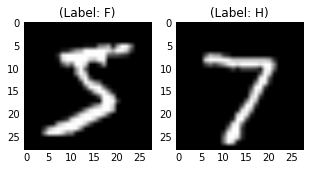

In [29]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(train_data[0], (28,28))
curr_lbl = train_labels[0]
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(test_data[0], (28,28))
curr_lbl = test_labels[0]
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

In [13]:
train_data = train_data.reshape(-1, 28,28, 1)
test_data = test_data.reshape(-1, 28,28, 1)
train_data.shape, test_data.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [14]:
train_data.dtype, test_data.dtype

(dtype('float32'), dtype('float32'))

In [15]:
np.max(train_data), np.max(test_data)

(255.0, 255.0)

In [16]:
train_data = train_data / np.max(train_data)
test_data = test_data / np.max(test_data)

In [17]:
np.max(train_data), np.max(test_data)

(1.0, 1.0)

In [18]:
from sklearn.cross_validation import train_test_split

In [19]:
#from sklearn.model_selection import train_test_split
train_X,valid_X,train_ground,valid_ground = train_test_split(train_data,
                                                             train_data, 
                                                             test_size=0.2, 
                                                             random_state=13)

In [20]:
import sklearn

In [21]:
batch_size = 128
epochs = 2
inChannel = 1
x, y = 28, 28
input_img = Input(shape = (x, y, inChannel))

In [23]:
def autoencoder(input_img):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)

    #decoder
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 128
    up1 = UpSampling2D((2,2))(conv4) # 14 x 14 x 128
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 64
    up2 = UpSampling2D((2,2))(conv5) # 28 x 28 x 64
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
    return decoded

In [24]:
autoencoder = Model(input_img, autoencoder(input_img))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())

In [25]:
autoencoder

In [26]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         147584    
__________

In [27]:
autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_ground))

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 420s 9ms/step - loss: 0.1124 - val_loss: 0.1123

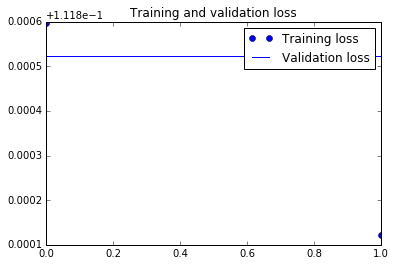

In [28]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(epochs)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [29]:
pred = autoencoder.predict(test_data)

In [30]:
pred.shape

(10000, 28, 28, 1)

In [ ]:
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(test_data[i, ..., 0], cmap='gray')
    curr_lbl = test_labels[i]
    plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")
plt.show()    
plt.figure(figsize=(20, 4))
print("Reconstruction of Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i, ..., 0], cmap='gray')  
plt.show()

In [ ]:
############################################################################

In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

Using TensorFlow backend.


In [3]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [4]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [6]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [12]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_train = x_train[:1000,]
x_test = x_test[:200,]
print (x_train.shape)
print (x_test.shape)

(1000, 784)
(200, 784)


In [13]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 1000 samples, validate on 200 samples
Epoch 1/10
1000/1000 [==============================] - 1s 577us/step - loss: 0.6927 - val_loss: 0.6920
Epoch 2/10
1000/1000 [==============================] - 0s 190us/step - loss: 0.6915 - val_loss: 0.6908
Epoch 3/10
1000/1000 [==============================] - 0s 149us/step - loss: 0.6903 - val_loss: 0.6895
Epoch 4/10
1000/1000 [==============================] - 0s 160us/step - loss: 0.6891 - val_loss: 0.6883
Epoch 5/10
1000/1000 [==============================] - 0s 148us/step - loss: 0.6879 - val_loss: 0.68

In [15]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [16]:
encoded_imgs.shape

(200, 32)

In [17]:
encoded_imgs

array([[0.        , 0.03079092, 0.        , ..., 0.        , 0.00011225,
        0.        ],
       [0.        , 0.03079092, 0.        , ..., 0.        , 0.00011225,
        0.        ],
       [0.        , 0.03079092, 0.        , ..., 0.        , 0.00011225,
        0.        ],
       ...,
       [0.        , 0.03079092, 0.        , ..., 0.        , 0.00011225,
        0.        ],
       [0.        , 0.03079092, 0.        , ..., 0.        , 0.00011225,
        0.        ],
       [0.        , 0.03079092, 0.        , ..., 0.        , 0.00011225,
        0.        ]], dtype=float32)

In [18]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()